/tmp/ipykernel_4075/1663710508.py:14: FutureWarning: the 'access_key'' keyword is deprecated, use 'api_key' instead.
  stock_quotes = pdd.DataReader('WIKI/INTC', 'quandl', start, end,


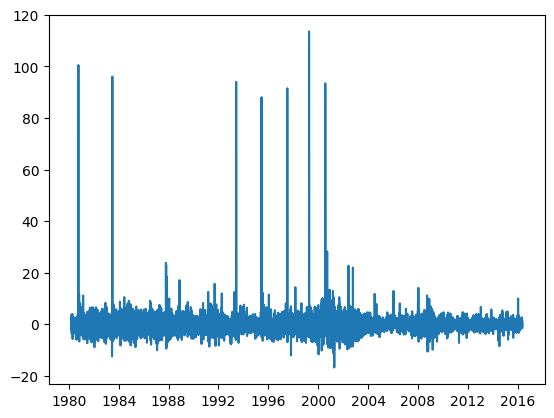

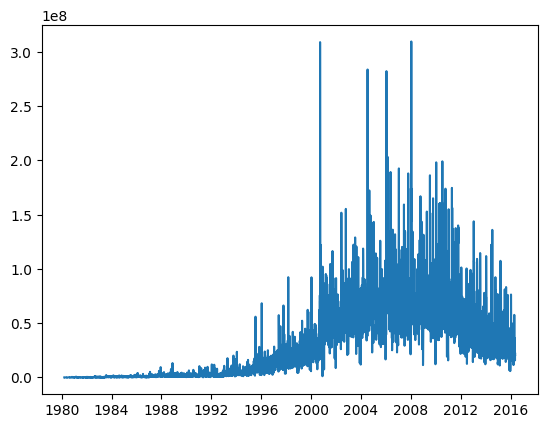

In [40]:
import datetime 
import numpy as np 
import matplotlib.pyplot as plt 
from hmmlearn.hmm import GaussianHMM 
import pandas as pd
import pandas_datareader.data as pdd
%matplotlib inline

QUANDL_API_KEY = 'xxxxxxxxxxxxxxxxxxxx'
assert QUANDL_API_KEY != 'xxxxxxxxxxxxxxxxxxxx', 'You must set a valid API KEY.'

start = datetime.date(1970, 9, 4) 
end = datetime.date(2016, 5, 17) 
stock_quotes = pdd.DataReader('WIKI/INTC', 'quandl', start, end,
                              access_key=QUANDL_API_KEY)

closing_quotes = np.array(stock_quotes['Close'])
volumes = np.array(stock_quotes['Volume'])[1:]


diff_percentages = 100.0 * np.diff(closing_quotes) / closing_quotes[:-1] 
training_data = np.column_stack([diff_percentages[::-1], volumes[::-1]]) 

plt.figure()
plt.plot(stock_quotes.index[1:][::-1], training_data[:,0])
plt.show()

plt.plot(stock_quotes.index[1:][::-1], training_data[:,1])
plt.show()


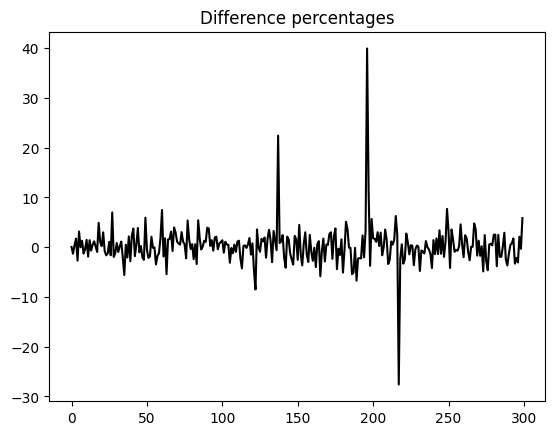

In [46]:

hmm = GaussianHMM(n_components=7, covariance_type='diag', n_iter=1000) 
hmm.fit(training_data) 

num_samples = 300 
samples, _ = hmm.sample(num_samples) 


plt.figure() 
plt.title('Difference percentages') 
plt.plot(np.arange(num_samples), samples[:, 0], c='black') 
plt.show() 

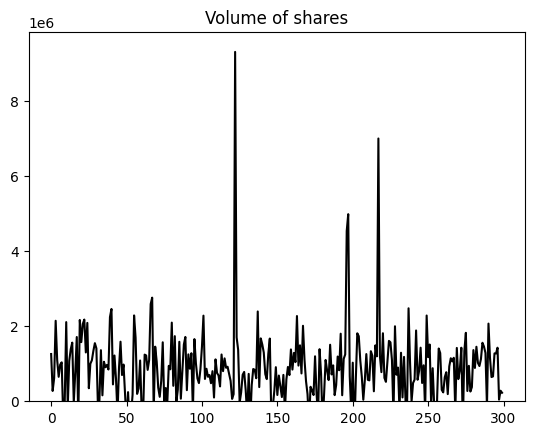

In [47]:
plt.figure() 
plt.title('Volume of shares') 
plt.plot(np.arange(num_samples), samples[:, 1], c='black') 
plt.ylim(ymin=0) 
plt.show() 